In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
from itertools import combinations
from functools import reduce

In [72]:
df_region = pd.read_csv('E:\Data\Eve-Online/mapRegions.csv')
df_war_sample = pd.read_csv('E:\Data\Eve-Online/eve_war_635778.csv',index_col=0)
df_war_position = pd.read_csv('E:\Data\Eve-Online/df_war_position.csv',index_col=0)

In [127]:
df_war_sample.head()

,killmail_id,killmail_time,solar_system_id,war_id,killmail_hash,http_last_modified,victim_corporation_id,victim_damage_taken,victim_position_x,victim_position_y,victim_position_z,victim_ship_type_id,victim_alliance_id,victim_character_id
0,75579742,2019-03-08T19:07:48Z,30002427,635778,285480c5527f6ae7ae3e2622f78059e340b712ad,2021-07-13T03:08:41Z,98477766,1225.0,-1.793045e+12,2.108489e+11,-2.659881e+12,2161,99005338,2.114064e+09
1,75579799,2019-03-08T19:09:41Z,30000896,635778,d5056028784498fa7756282237b9127a48fcc8d7,2021-07-13T03:08:41Z,98397049,1711.0,-1.834313e+11,-2.547843e+11,-2.556887e+11,35683,1354830081,9.642129e+07
2,75579868,2019-03-08T19:13:17Z,30002459,635778,19ac1526d63102289189a1a6d00a0079bc12b57d,2021-07-13T03:08:41Z,98388312,2847.0,-2.347784e+11,1.124645e+10,2.737794e+11,11202,99005338,9.448351e+07
3,75579875,2019-03-08T19:13:46Z,30002459,635778,6cb4e95738bc48cf09e192aa15ba1cb3cf3e2177,2021-07-13T03:12:02Z,98388312,461.0,-2.347784e+11,1.124645e+10,2.737794e+11,670,99005338,9.448351e+07
4,75579917,2019-03-08T19:16:03Z,30002447,635778,06b00fd0d55af7addff06bbe1e43699cc0fa8491,2021-07-13T03:12:02Z,98388312,1074.0,3.303501e+12,4.185719e+11,-1.858627e+12,608,99005338,9.281368e+07


In [126]:
df_war_position

,war_id,x_mean,y_mean,z_mean
0,458064,1.126569e+12,3.222645e+11,1.943772e+12
1,459762,1.280833e+12,-2.746741e+11,-3.335993e+11
2,461342,-2.584698e+11,-5.269223e+10,1.482647e+11
3,461434,-1.073033e+11,-1.874499e+10,4.364891e+11
4,463082,-2.630312e+11,-2.061397e+10,-8.105175e+11
...,...,...,...,...
56427,656546,-1.334602e+12,-4.038232e+11,-1.768634e+12
56428,656624,2.792442e+11,-2.674962e+10,1.695667e+11
56429,656863,-1.047876e+12,-9.003803e+11,-5.722595e+10
56430,657637,-5.449886e+11,-1.376370e+12,9.561724e+11


In [5]:
df_war_sample.head()

,killmail_id,killmail_time,solar_system_id,war_id,killmail_hash,http_last_modified,victim_corporation_id,victim_damage_taken,victim_position_x,victim_position_y,victim_position_z,victim_ship_type_id,victim_alliance_id,victim_character_id
0,75579742,2019-03-08T19:07:48Z,30002427,635778,285480c5527f6ae7ae3e2622f78059e340b712ad,2021-07-13T03:08:41Z,98477766,1225.0,-1.793045e+12,2.108489e+11,-2.659881e+12,2161,99005338,2.114064e+09
1,75579799,2019-03-08T19:09:41Z,30000896,635778,d5056028784498fa7756282237b9127a48fcc8d7,2021-07-13T03:08:41Z,98397049,1711.0,-1.834313e+11,-2.547843e+11,-2.556887e+11,35683,1354830081,9.642129e+07
2,75579868,2019-03-08T19:13:17Z,30002459,635778,19ac1526d63102289189a1a6d00a0079bc12b57d,2021-07-13T03:08:41Z,98388312,2847.0,-2.347784e+11,1.124645e+10,2.737794e+11,11202,99005338,9.448351e+07
3,75579875,2019-03-08T19:13:46Z,30002459,635778,6cb4e95738bc48cf09e192aa15ba1cb3cf3e2177,2021-07-13T03:12:02Z,98388312,461.0,-2.347784e+11,1.124645e+10,2.737794e+11,670,99005338,9.448351e+07
4,75579917,2019-03-08T19:16:03Z,30002447,635778,06b00fd0d55af7addff06bbe1e43699cc0fa8491,2021-07-13T03:12:02Z,98388312,1074.0,3.303501e+12,4.185719e+11,-1.858627e+12,608,99005338,9.281368e+07


In [6]:
df_region.head()

,regionID,regionName,x,y,z,xMin,xMax,yMin,yMax,zMin,zMax,factionID,nebula,radius
0,10000001,Derelik,-7.736195e+16,5.087803e+16,-6.443310e+16,-1.055500e+17,-4.917392e+16,2.712855e+16,7.462751e+16,2.642336e+16,1.024428e+17,500007,11799,None
1,10000002,The Forge,-9.642033e+16,6.402708e+16,1.125398e+17,-1.436457e+17,-4.919500e+16,3.515456e+16,9.289960e+16,-1.444526e+17,-8.062703e+16,500001,11806,None
2,10000003,Vale of the Silent,-4.406932e+16,9.472944e+16,1.813847e+17,-9.923376e+16,1.109511e+16,5.820417e+16,1.312547e+17,-2.188796e+17,-1.438898e+17,None,11814,None
3,10000004,UUA-F4,8.986800e+16,5.478010e+16,2.725758e+17,6.739083e+16,1.123452e+17,1.386504e+16,9.569515e+16,-3.807742e+17,-1.643773e+17,None,11817,None
4,10000005,Detorid,1.335404e+17,-3.139150e+16,-1.963923e+17,5.808592e+16,2.089949e+17,-5.072033e+16,-1.206267e+16,1.647489e+17,2.280357e+17,None,11849,None


In [113]:
dfs = []
for cols in [('xMin', 'yMin'),('xMin', 'yMax'),('xMax', 'yMax'),('xMax', 'yMin'),('xMin', 'yMin')]:
    x,y = cols[0],cols[1]
    dfs.append(df_region[[x,y]].rename({x:'x',y:'y'},axis=1))
#Create a db where each row is the 4 corners of the region 
out_df = pd.DataFrame(index=dfs[0].index)
for idx,df in enumerate(dfs):
    out_df = out_df.join(df,rsuffix=idx)

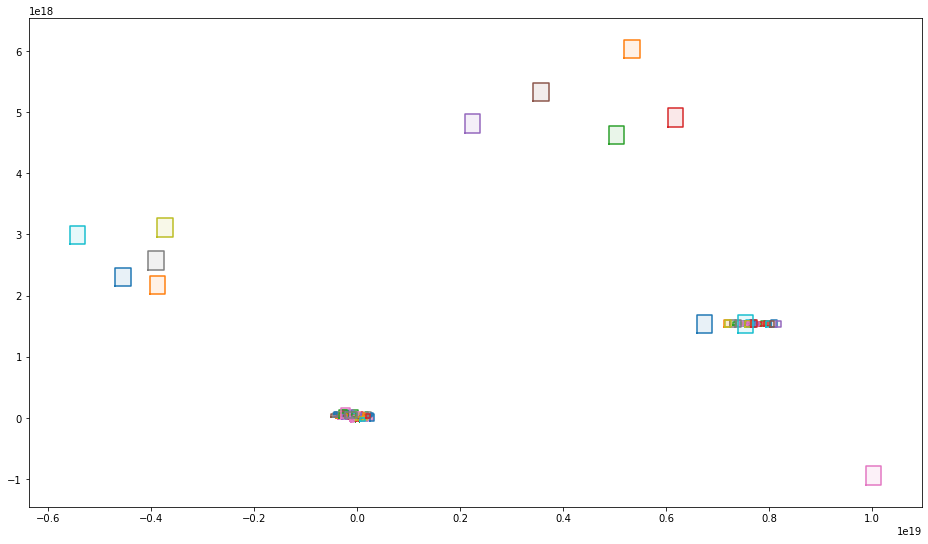

In [98]:
x_col = ['x','x1','x2','x3','x4']
y_col = ['y','y1','y2','y3','y4']
plt.figure(figsize=(16,9))
for idx,row in out_df.iterrows():
    plt.plot(row[x_col], row[y_col])
    plt.fill(row[x_col], row[y_col],alpha=0.1)
    
################################################################
plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')
plt.show()

In [87]:
df_war_sample_2 = pd.read_csv('E:\Data\Eve-Online/war_sample_291410.csv',index_col=0)
df_war_sample_2.head()

,killmail_id,killmail_time,solar_system_id,war_id,killmail_hash,http_last_modified,victim.corporation_id,victim.damage_taken,victim.position.x,victim.position.y,victim.position.z,victim.ship_type_id,victim.alliance_id,victim.character_id
0,51068899.0,2016-01-01 00:46:16,30002795.0,291410,d0e192095dc375dd403d6c0ab2aad93fd7f1f816,2021-07-18 21:10:01,1.741771e+09,3045.0,-9.103786e+09,-1.067681e+08,5.476665e+10,593.0,99000652.0,93247997.0
1,51068941.0,2016-01-01 00:49:56,30002795.0,291410,99f6a58053c3e0aa82ff3531db9fa059b5f33cbd,2021-07-18 21:10:01,1.741771e+09,967.0,1.315026e+11,1.538106e+09,5.100318e+10,583.0,99000652.0,93643699.0
2,51069054.0,2016-01-01 01:00:19,30002795.0,291410,0e24a3d22dbe2e4d2d4bf4bbda633db12d41329f,2021-07-18 21:10:01,1.741771e+09,1817.0,1.315029e+11,1.538089e+09,5.100319e+10,591.0,99000652.0,93643699.0
3,51069150.0,2016-01-01 01:05:12,30002795.0,291410,8eb3291a3aa18b971ad03f5cd5b4e8c6633a2524,2021-07-18 21:10:02,1.741771e+09,2240.0,1.315026e+11,1.538093e+09,5.100342e+10,594.0,99000652.0,93643699.0
4,51070104.0,2016-01-01 02:28:16,30002795.0,291410,b37a7deff3e35f420d4c1c8e72e624800d09c8d0,2021-07-18 21:10:02,1.741771e+09,5764.0,-9.103794e+09,-1.067656e+08,5.476664e+10,594.0,99000652.0,93247997.0


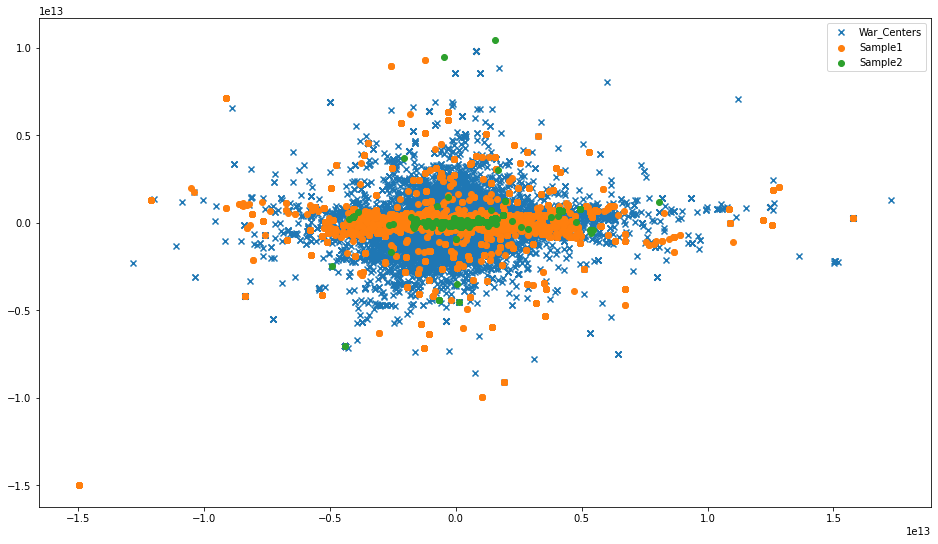

In [100]:
plt.figure(figsize=(16,9))
plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')
plt.scatter(df_war_sample[['victim_position_x']],	df_war_sample[['victim_position_y']])
plt.scatter(df_war_sample_2[['victim.position.x']],	df_war_sample_2[['victim.position.y']])
plt.legend(['War_Centers','Sample1','Sample2'])

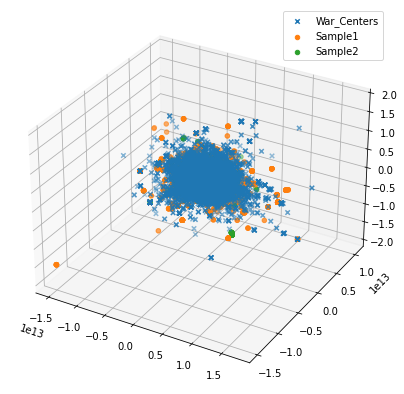

In [103]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df_war_position[['x_mean']],df_war_position[['y_mean']],df_war_position[['z_mean']],marker='x')
ax.scatter3D(df_war_sample[['victim_position_x']],	df_war_sample[['victim_position_y']],df_war_sample[['victim_position_z']] )
ax.scatter3D(df_war_sample_2[['victim.position.x']],	df_war_sample_2[['victim.position.y']], df_war_sample_2[['victim.position.z']])
plt.legend(['War_Centers','Sample1','Sample2'])

In [105]:
df_minmax = pd.read_csv('E:\Data\Eve-Online/xyz_minmax.csv',index_col=0)
df_minmax

,x_max,x_min,y_max,y_min,z_max,z_min
0,2.097931e+13,-1.888386e+13,1.623938e+13,-1.495979e+13,1.847862e+13,-3.113429e+13


In [111]:
dfs = []
for cols in [('x_min', 'y_min'),('x_min', 'y_max'),('x_max', 'y_max'),('x_max', 'y_min'),('x_min', 'y_min')]:
    x,y = cols[0],cols[1]
    dfs.append(df_minmax[[x,y]].rename({x:'x',y:'y'},axis=1))
#Create a db where each row is the 4 corners of the region 
out_df_2 = pd.DataFrame(index=dfs[0].index)
for idx,df in enumerate(dfs):
    out_df_2 = out_df_2.join(df,rsuffix=idx)

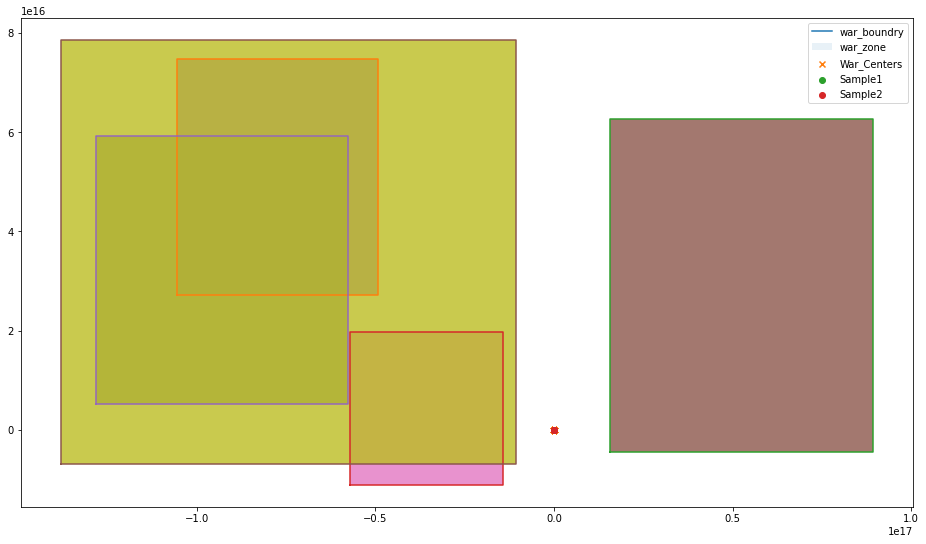

In [116]:

plt.figure(figsize=(16,9))
for idx,row in out_df_2.iterrows():
    plt.plot(row[x_col], row[y_col])
    plt.fill(row[x_col], row[y_col],alpha=0.1)
    
plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')
plt.scatter(df_war_sample[['victim_position_x']],	df_war_sample[['victim_position_y']])
plt.scatter(df_war_sample_2[['victim.position.x']],	df_war_sample_2[['victim.position.y']])
plt.legend(['war_boundry','war_zone','War_Centers','Sample1','Sample2'])

for idx,row in out_df.iterrows():
    if idx in temp.head().index:
        plt.plot(row[x_col], row[y_col])
        plt.fill(row[x_col], row[y_col],alpha=0.8)
    else:
        pass

In [ ]:
plt.figure(figsize=(16,9))
for idx,row in out_df.iterrows():
    plt.plot(row[x_col], row[y_col])
    plt.fill(row[x_col], row[y_col],alpha=0.1)
    
plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')
plt.scatter(df_war_sample[['victim_position_x']],	df_war_sample[['victim_position_y']])
plt.scatter(df_war_sample_2[['victim.position.x']],	df_war_sample_2[['victim.position.y']])
plt.legend(['war_boundry','war_zone','War_Centers','Sample1','Sample2'])

### Calculating Distance

In [56]:
xyz = (df_war_sample[['victim_position_x',	'victim_position_y',    'victim_position_z']].mean(axis=0)).values

In [62]:
res = ((xyz- df_region[['x','y','z']])**2).sum(axis=1)
temp = pd.DataFrame(res,columns=['Distance']).sort_values(by='Distance',ascending=True)
idx_max = temp[:1].index[0]
distance = temp[:1].Distance.iloc[0]

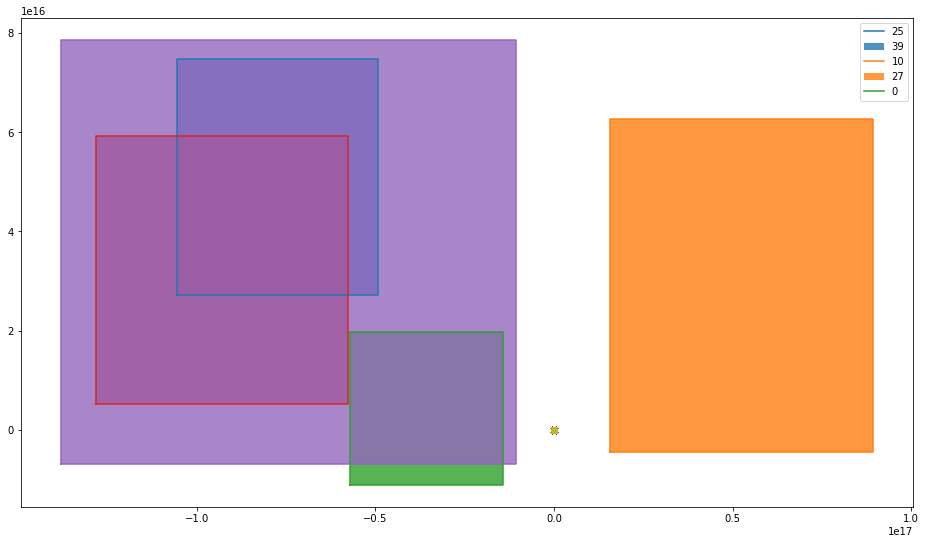

In [97]:
x_col = ['x','x1','x2','x3','x4']
y_col = ['y','y1','y2','y3','y4']
plt.figure(figsize=(16,9))
for idx,row in out_df.iterrows():
    if idx in temp.head().index:
        plt.plot(row[x_col], row[y_col])
        plt.fill(row[x_col], row[y_col],alpha=0.8)
    else:
        pass
    
################################################################
plt.legend(temp.head().index)
plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')

plt.scatter(df_war_position[['x_mean']],df_war_position[['y_mean']],marker='x')
plt.scatter(df_war_sample[['victim_position_x']],	df_war_sample[['victim_position_y']])
plt.scatter(df_war_sample_2[['victim.position.x']],	df_war_sample_2[['victim.position.y']])